# Posttest 4 - Praktikum Kecerdasan Buatan 2024

### DIO DHARMAESA (2209106053)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
import numpy as np

import pandas as pd
dataDio053 =  pd.read_csv('cs_students.csv')

pertama, diatas adalah beberapa library yang saya gunakan dan ada juga kode untuk memasukan dataset didalam file csv saya yaitu cs_student.csv

In [2]:
dataDio053.head(10)

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong
5,6,Laura Lee,Female,22,3.9,Computer Science,Machine Learning,Image Recognition,Machine Learning Engineer,Strong,Average,Weak
6,7,William Johnson,Male,20,3.6,Computer Science,Database Management,SQL Query Optimization,Database Administrator,Average,Strong,Weak
7,8,Sarah Miller,Female,21,3.7,Computer Science,Cloud Computing,AWS Deployment,Cloud Solutions Architect,Weak,Strong,Average
8,9,James Wilson,Male,23,3.3,Computer Science,Mobile App Development,Android App,Mobile App Developer,Average,Weak,Strong
9,10,Olivia Clark,Female,22,3.5,Computer Science,Computer Graphics,3D Rendering,Graphics Programmer,Weak,Average,Strong


kemudian code diatas saya melihatkan isi data dari dataset saya, dimana data2 diatas ditampilkan sebanyak 10 data teratas saja. 

In [3]:
dataDio053.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


lalu, kode diatas memperlihatkan nama2 kolom, jumlah record, dan data typenya untuk masing2 kolomnya.

In [ ]:
X = dataDio053[['Age', 'GPA']]
y = dataDio053['Future Career']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

kemudian saya bagi data menjadi dua bagian, yaitu satu untuk melatih modeluntuk menguji model.

In [12]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

pada tahap ini melatih model menggunakan Support Vector Classifier dari sklearn.svm, sekaligus memprediksi data uji.

In [15]:
y_pred = svc_model.predict(X_test)

kode diatas digunakan utk prediksi data uji.

In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

accuracy_table = PrettyTable()
accuracy_table.field_names = ["Metric", "Value"]
accuracy_table.add_row(["Accuracy", round(accuracy, 4)])

report_dict = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
classification_table = PrettyTable()

classification_table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

for label, metrics in report_dict.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        classification_table.add_row([
            label,
            round(metrics['precision'], 2),
            round(metrics['recall'], 2),
            round(metrics['f1-score'], 2),
            int(metrics['support'])
        ])

avg_table = PrettyTable()
avg_table.field_names = ["Metric", "Precision", "Recall", "F1-Score", "Support"]

for avg_type in ['macro avg', 'weighted avg']:
    avg_table.add_row([
        avg_type,
        round(report_dict[avg_type]['precision'], 2),
        round(report_dict[avg_type]['recall'], 2),
        round(report_dict[avg_type]['f1-score'], 2),
        int(report_dict[avg_type]['support'])
    ])

kode diatas menunjukan accuracy_score dan classification_report untuk mengevaluasi kinerja model.

In [20]:
print(accuracy_table)
print(classification_table)
print(avg_table)

+----------+--------+
|  Metric  | Value  |
+----------+--------+
| Accuracy | 0.0556 |
+----------+--------+
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    1.0    |  0.0   |   0.0    |    1    |
|   1   |    1.0    |  0.0   |   0.0    |    1    |
|   3   |    1.0    |  0.0   |   0.0    |    5    |
|   5   |    1.0    |  0.0   |   0.0    |    1    |
|   7   |    1.0    |  0.0   |   0.0    |    1    |
|   8   |    1.0    |  0.0   |   0.0    |    2    |
|   11  |    1.0    |  0.0   |   0.0    |    1    |
|   13  |    1.0    |  0.0   |   0.0    |    1    |
|   14  |    1.0    |  0.0   |   0.0    |    1    |
|   16  |    1.0    |  0.0   |   0.0    |    1    |
|   17  |    1.0    |  0.0   |   0.0    |    1    |
|   18  |    0.06   |  1.0   |   0.11   |    2    |
|   19  |    1.0    |  0.0   |   0.0    |    1    |
|   20  |    1.0    |  0.0   |   0.0    |    2    |
|   22

kemudian code diatas digunakan untuk menampilkan hasil kerja atau evaluasi kode sebelumny.

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix :")
print(conf_matrix)
plt.show()

Confusion Matrix :
[[ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]]


lalu kode diatas merupakan hasil evaluasi mengguna confused matrix.

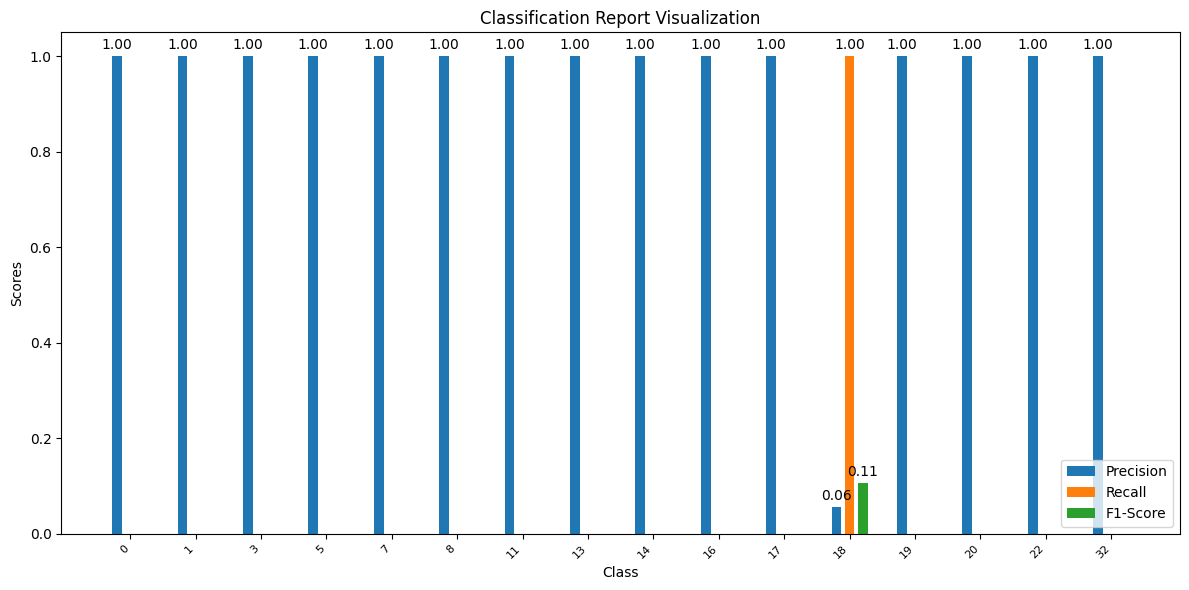

In [23]:
labels = list(report_dict.keys())[:-3] 
precision = [report_dict[label]['precision'] for label in labels]
recall = [report_dict[label]['recall'] for label in labels]
f1_scores = [report_dict[label]['f1-score'] for label in labels]
x = np.arange(len(labels))

width = 0.15
gap = 0.05

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width - gap, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width + gap, f1_scores, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax.legend()

def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0.01:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

plt.tight_layout()
plt.show()

In [27]:
dataDio053 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

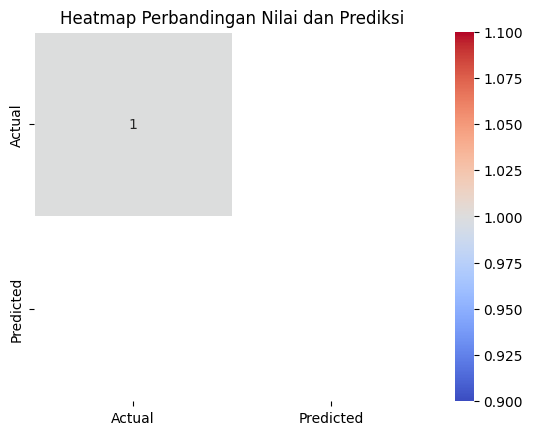

In [28]:
sns.heatmap(dataDio053.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Perbandingan Nilai dan Prediksi")
plt.show()

kode diatas saya data baru dengan isi kolom aktual dan kolom presiksi dan juga menampilkan code buat menampilkan heatmap dari aktual dan prediksi.

KESIMPULAN: berdasarkan heatmap yang ditampilkan, terlihat bahwa hasilnya hanya menampilkan satu nilai yaitu 1, baik untuk aktual atau prekdiksi. tampaknya seluruh prediksi model cocok 100% dengan nilai sebenarnya (actual). Artinya, semua data yang diuji telah diprediksi dengan benar oleh model.